In [1]:
import os
import matplotlib.pyplot as plt      
import numpy as np
import PIL                      
import keras                   
from flask import Flask, request, redirect, render_template
from werkzeug.utils import secure_filename
import statsmodels.api as sm

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Nov/2022 23:10:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2022 23:10:33] "GET /index HTTP/1.1" 200 -


Yearly
Yearly
2
AirPassengers.csv
Yearly
yes


C:\Users\Sinegalatha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sinegalatha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1960-12-01
1962-12-01
             0
0   432.000000
1   421.240383
2   468.172099
3   454.963203
4   462.793275
5   532.349304
6   581.485722
7   655.163669
8   802.591063
9   876.103412
10  766.276845
11  620.808755
12  504.456416
13  479.893332
14  527.868984
15  513.337775
16  517.998975
17  587.949220
18  639.367583
19  713.505890
20  862.584292
21  935.088032
22  823.384139
23  678.470634
24  561.564738
25  534.987036


127.0.0.1 - - [10/Nov/2022 23:10:44] "POST /index2 HTTP/1.1" 200 -


Monthly
Monthly
4
AirPassengers.csv
Monthly
yes


C:\Users\Sinegalatha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sinegalatha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1960-12-01
1961-04-01
            0
0  432.000000
1  421.240383
2  468.172099
3  454.963203
4  462.793275
5  532.349304


127.0.0.1 - - [10/Nov/2022 23:10:57] "POST /index2 HTTP/1.1" 200 -


Days
Days
10
AirPassengers.csv
Days


C:\Users\Sinegalatha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sinegalatha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1960-12-01
1960-12-11
            0
0  432.000000
1  421.240383
2  468.172099


127.0.0.1 - - [10/Nov/2022 23:11:09] "POST /index2 HTTP/1.1" 200 -


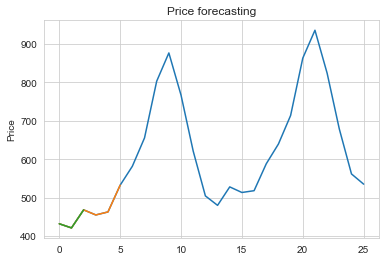

In [3]:
from flask import Flask, request, redirect, render_template
import io
from datetime import date, timedelta
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import imageio as iio
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from io import BytesIO
from PIL import Image
import base64
allowed_exts = {'csv', 'xlsx'}
app = Flask(__name__)
def check_allowed_file(filename):
	return '.' in filename and filename.rsplit('.', 1)[1].lower() in allowed_exts
@app.route("/",methods=['GET', 'POST'])
def home():
    return render_template('front.html')
@app.route("/index",methods=['GET', 'POST'])
def index():
    return render_template('index.html')
@app.route("/index2",methods=['GET', 'POST'])
def index2():
	if request.method == 'POST':
		if 'file' not in request.files:
			print('No file attached in request')
			return redirect(request.url)
		file = request.files['file']
		period=request.form.get("period")
		print(period)
		count=int(request.form.get("count"))
		print(period)
		print(count)
		if file.filename == '':
			print('No file selected')
			return redirect(request.url)
		if file and check_allowed_file(file.filename):
			filename = secure_filename(file.filename)
			print(filename)
			file.save("C:/Users/Sinegalatha/Desktop/Kaar/Digiverse Project/salesforecasting/static/"+filename)
			data = pd.read_csv("C:/Users/Sinegalatha/Desktop/Kaar/Digiverse Project/salesforecasting/static/"+filename)
			data1=data     
			data1["Period"] = data1['datesold'].astype(str) +"-"+ '01'
			data['datesold']=pd.to_datetime(data['datesold'],infer_datetime_format=True)
			data.set_index(['datesold'],inplace=True)
			data.sort_index(inplace=True)
			print(period)
			if period=="Days":
				st=data1['Period'].iloc[-1]
				arr=list(map(int,st.split('-')))
				std = datetime(arr[0], arr[1], arr[2])
				new_date = std + timedelta(count)
				en=new_date.date()
			elif period=="Monthly":
				print("yes")
				st=data1['Period'].iloc[-1]
				arr=list(map(int,st.split('-')))
				std = datetime(arr[0], arr[1], arr[2])
				new_date = std + relativedelta(months=+count)
				en=new_date.date()
			elif period=="Yearly":
				print("yes")
				st=data1['Period'].iloc[-1]
				arr=list(map(int,st.split('-')))
				std = datetime(arr[0], arr[1], arr[2])
				new_date = std + relativedelta(years=+count)
				en=new_date.date()
			ts = data['price']
			df_shift=ts.diff(2).dropna()
			mod = sm.tsa.statespace.SARIMAX(df_shift,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
			results = mod.fit()
			p=[0]*count
			p[0]=data.iloc[-1][0]
			p[1:]=results.predict(start=std.date(),end=en)
			print(std.date())
			print(en)
			print(pd.DataFrame(p).cumsum())
			plt.plot(pd.DataFrame(p).cumsum())
			plt.ylabel('Price')
			plt.title('Price forecasting')
			plt.savefig('C:/Users/Sinegalatha/Desktop/Kaar/Digiverse Project/salesforecasting/static/v5.jpg')
			#img = iio.imread("C:/Users/Sinegalatha/Desktop/Kaar/Digiverse Project/salesforecasting/static/v5.jpg")
			img = Image.open("C:/Users/Sinegalatha/Desktop/Kaar/Digiverse Project/salesforecasting/static/v5.jpg")
			data = io.BytesIO()
			img.save(data, "JPEG")
			encoded_img_data = base64.b64encode(data.getvalue())
			return render_template('index2.html',img_data=encoded_img_data.decode('utf-8'))
	else:
		return render_template('index2.html')
if __name__ == "__main__":
	app.debug=True
	app.run(debug=False)